***

1.ANN

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
375/375 [==============================] - 11s 17ms/step - loss: 0.3665 - accuracy: 0.8958 - val_loss: 0.1719 - val_accuracy: 0.9503
Epoch 2/20
375/375 [==============================] - 4s 12ms/step - loss: 0.1465 - accuracy: 0.9561 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 3/20
375/375 [==============================] - 2s 7ms/step - loss: 0.1021 - accuracy: 0.9690 - val_loss: 0.1130 - val_accuracy: 0.9644
Epoch 4/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0766 - accuracy: 0.9770 - val_loss: 0.0985 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0906 - val_accuracy: 0.9712
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0380

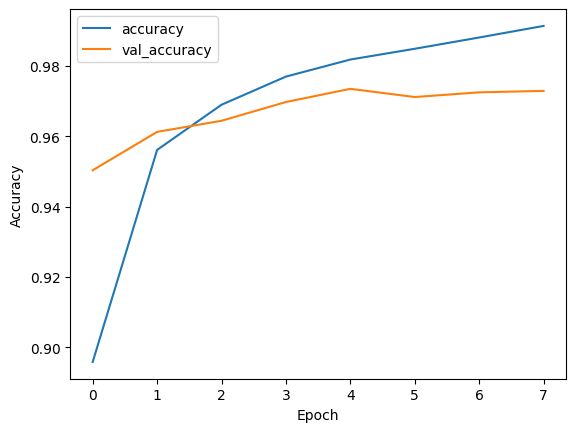

313/313 [==============================] - 1s 2ms/step


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Define the Model Architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 5: Train the Model with Early Stopping
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Step 7: Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Make Predictions
predictions = model.predict(x_test)


2.CNN

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/20
625/625 [==============================] - 8s 8ms/step - loss: 1.6576 - accuracy: 0.3945 - val_loss: 1.4930 - val_accuracy: 0.4680
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3100 - accuracy: 0.5296 - val_loss: 1.2104 - val_accuracy: 0.5699
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1471 - accuracy: 0.5943 - val_loss: 1.1125 - val_accuracy: 0.6061
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0389 - accuracy: 0.6330 - val_loss: 1.0782 - val_accuracy: 0.6237
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.9643 - accuracy: 0.6632 - val_loss: 1.0104 - val_accuracy: 0.6521
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.9023 - accuracy: 0.6843 - val_loss: 0.9901 - val_accuracy: 0.6596
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8482 

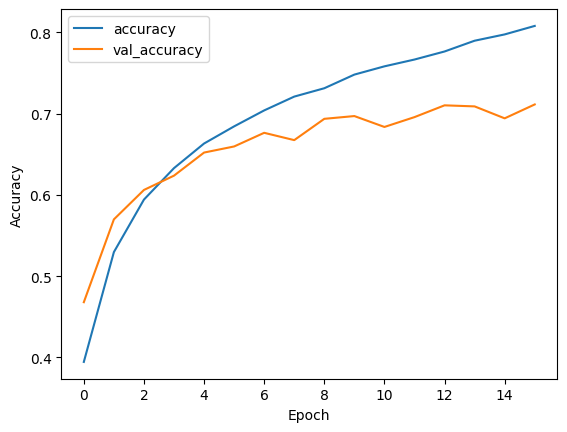

313/313 [==============================] - 1s 2ms/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define the Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Define Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 5: Train the Model with Early Stopping
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Step 7: Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Make Predictions
predictions = model.predict(x_test)


3.RNN

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Step 1: Load and Preprocess Data
max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Step 2: Define the Model Architecture
model = Sequential([
    Embedding(max_features, 128),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
625/625 [==============================] - 45s 66ms/step - loss: 0.4579 - accuracy: 0.7779 - val_loss: 0.4124 - val_accuracy: 0.8146
Epoch 2/5
625/625 [==============================] - 11s 18ms/step - loss: 0.2752 - accuracy: 0.8895 - val_loss: 0.3272 - val_accuracy: 0.8584
Epoch 3/5
625/625 [==============================] - 16s 26ms/step - loss: 0.1852 - accuracy: 0.9311 - val_loss: 0.3530 - val_accuracy: 0.8598
Epoch 4/5
625/625 [==============================] - 13s 21ms/step - loss: 0.2045 - accuracy: 0.9182 - val_loss: 0.3800 - val_accuracy: 0.8470
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.4733 - accuracy: 0.8515
Test Loss: 0.47331348061561584
Test Accuracy: 0.8515200018882751


***